In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from faker import Faker
import random
%matplotlib inline

fake = Faker()
def generate_weekly_data(start_date, num_weeks):
    dates = pd.date_range(start=start_date, periods=num_weeks, freq='W')
    
    time = np.arange(num_weeks)
    gdp_base = 50 + 15 * np.log1p(time)  # Steeper growth initially
    gdp_noise = np.random.normal(0, 5, num_weeks)  # More significant noise
    gdp = gdp_base + gdp_noise
    gdp = gdp.round(2)

    # Introduce some cyclical patterns to GDP (optional)
    seasonal_effect = 5 * np.sin(2 * np.pi * time / 52)  # Annual cycle
    gdp += seasonal_effect
    
    cci = np.random.normal(0, 3, num_weeks).round(2) 
    cpi = np.random.normal(-50, 10, num_weeks).round(2) 
    data = {
        'date': [date.strftime('%d/%m/%Y') for date in dates],
        'business_operations': np.random.normal(50000, 5000, num_weeks).astype(int),
        'inventory': np.random.normal(1000, 50, num_weeks).astype(int),
        'price': np.random.normal(20, 2, num_weeks).round(2),
        'loyalty_promotions': np.random.randint(1000, 2000, num_weeks),
        'weather': np.random.normal(25, 5, num_weeks).round(2),
        'seasonality': np.random.uniform(0.8, 1.2, num_weeks).round(2),
        'holiday_flags': [1 if fake.date_time_this_year().weekday() == 6 else 0 for _ in range(num_weeks)],  # Sunday as holiday
        'gdp': gdp,
        'cci': cci,
        'cpi': cpi,
        'competition_A_data': np.random.normal(30000, 3000, num_weeks).astype(int),
        'competition_B_data': np.random.normal(32000, 3200, num_weeks).astype(int),
        'competition_C_data': np.random.normal(28000, 2800, num_weeks).astype(int),
        'competition_D_data': np.random.normal(35000, 3500, num_weeks).astype(int),
        'digital_video_impressions': np.random.randint(1000000, 2000000, num_weeks),
        'digital_display_impressions': np.random.randint(900000, 1800000, num_weeks),
        'digital_audio_impressions': np.random.randint(500000, 1000000, num_weeks),
        'paid_social_impressions': np.random.randint(1200000, 2500000, num_weeks),
        'paid_search_impressions': np.random.randint(800000, 1600000, num_weeks),
        'paid_search_clicks': np.random.randint(40000, 80000, num_weeks),
        'affiliates_impressions': np.random.randint(700000, 1400000, num_weeks),
        'affiliates_clicks': np.random.randint(35000, 70000, num_weeks),
        'email_sent': np.random.randint(10000, 20000, num_weeks),
        'tv_grps': np.random.randint(100, 200, num_weeks),
        'radio_grps': np.random.randint(150, 250, num_weeks),
        'print_circulation': np.random.randint(300000, 600000, num_weeks),
        'dm_sent': np.random.randint(5000, 10000, num_weeks),
        
    }
    return pd.DataFrame(data)

num_weeks = 156  
start_date = '01/01/2022'
df = generate_weekly_data(start_date, num_weeks)

df.to_csv('dummy_marketing_mix_data1.csv', index=False)
print("Dummy dataset created and saved as 'dummy_marketing_mix_data10.csv'.")

Dummy dataset created and saved as 'dummy_marketing_mix_data10.csv'.


In [5]:
df['date']

0      02/01/2022
1      09/01/2022
2      16/01/2022
3      23/01/2022
4      30/01/2022
          ...    
151    24/11/2024
152    01/12/2024
153    08/12/2024
154    15/12/2024
155    22/12/2024
Name: date, Length: 156, dtype: object

C:\Users\HP\AppData\Local\Temp\ipykernel_1548\2757241670.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15,5))


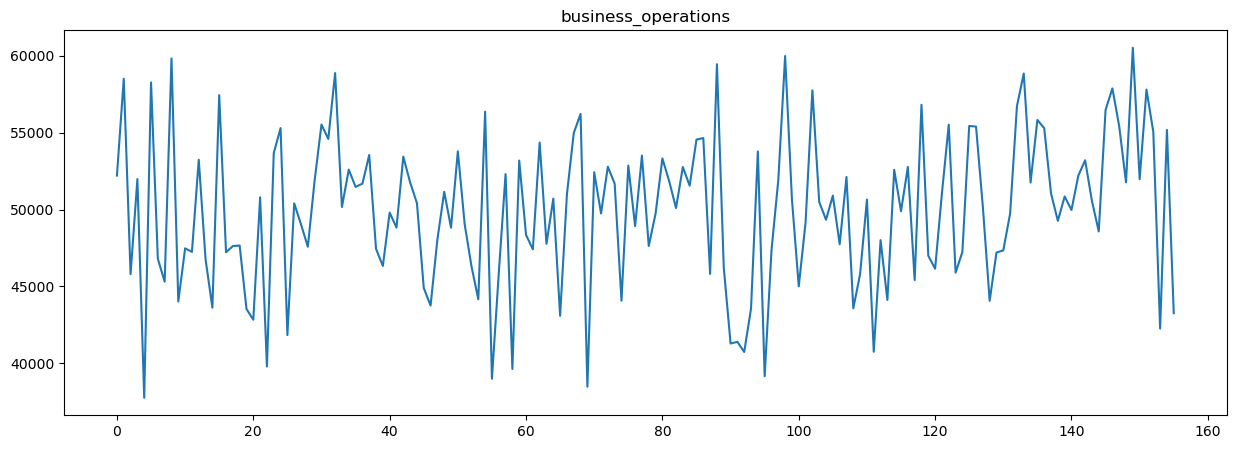

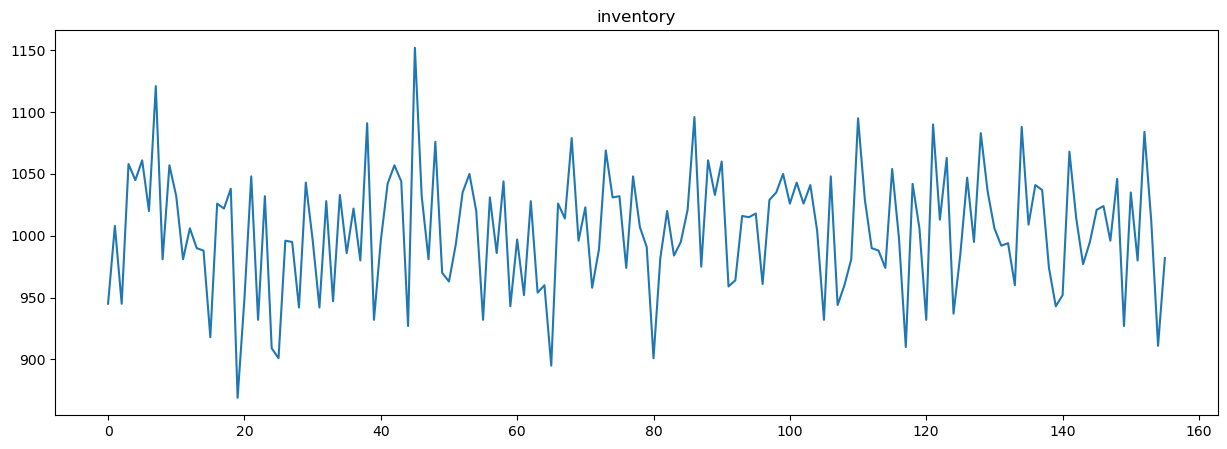

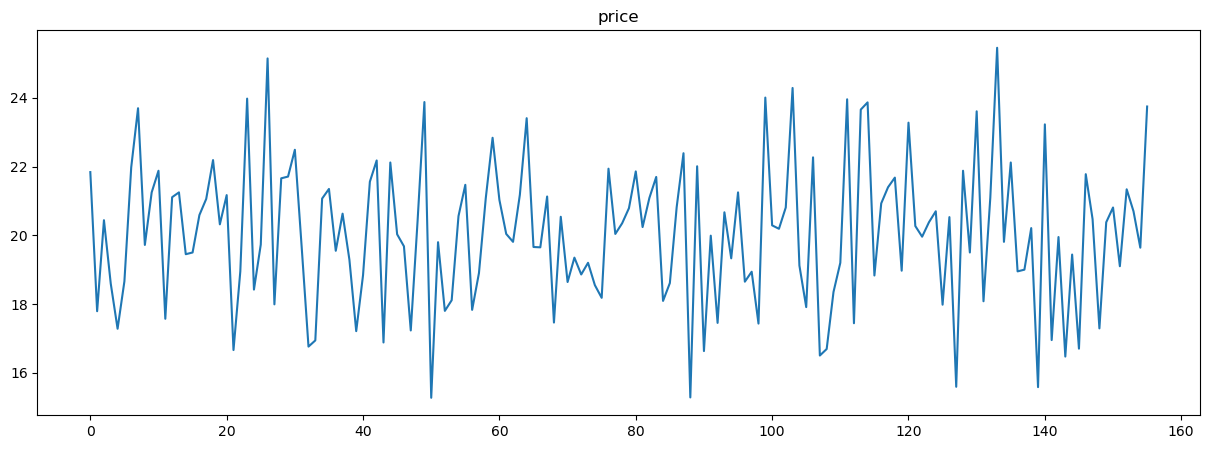

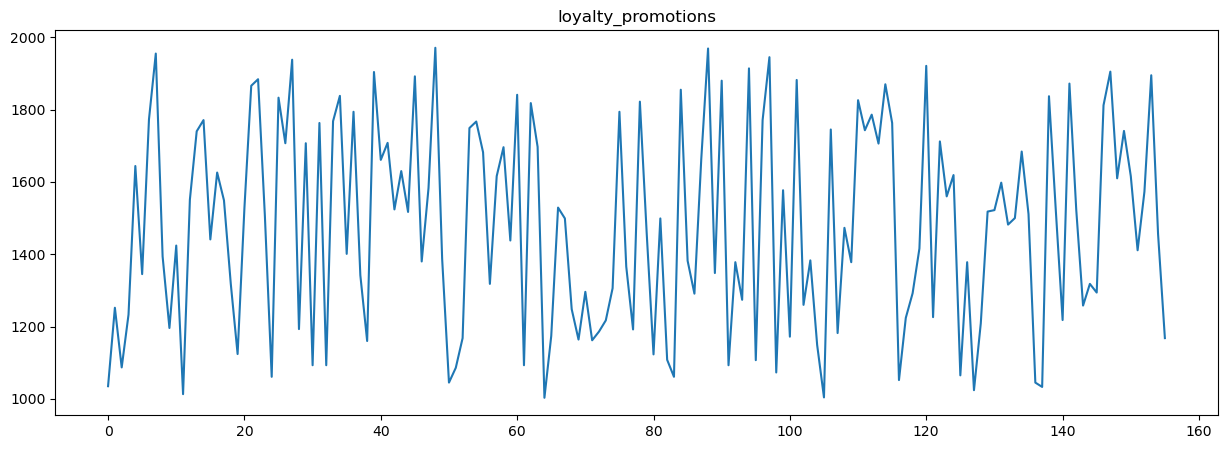

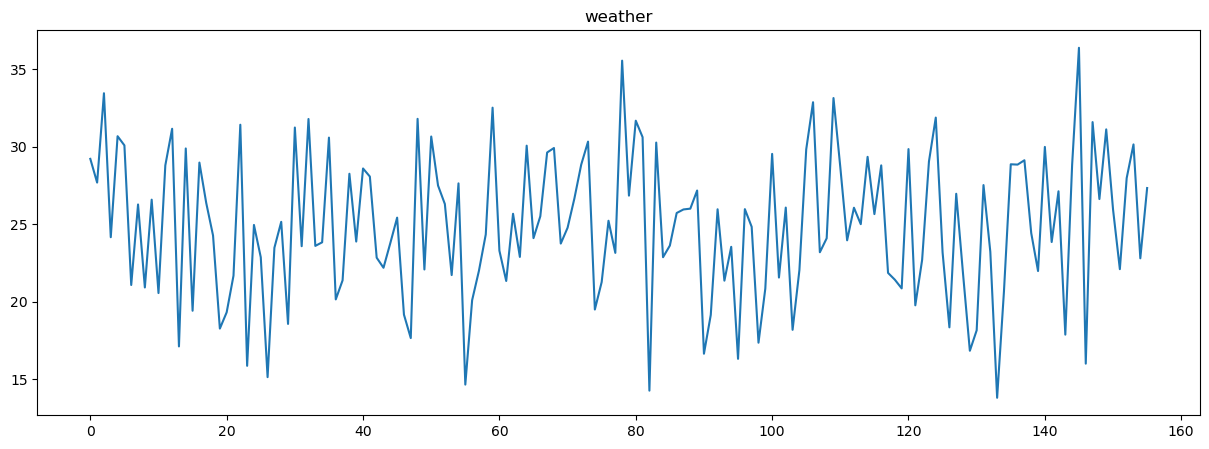

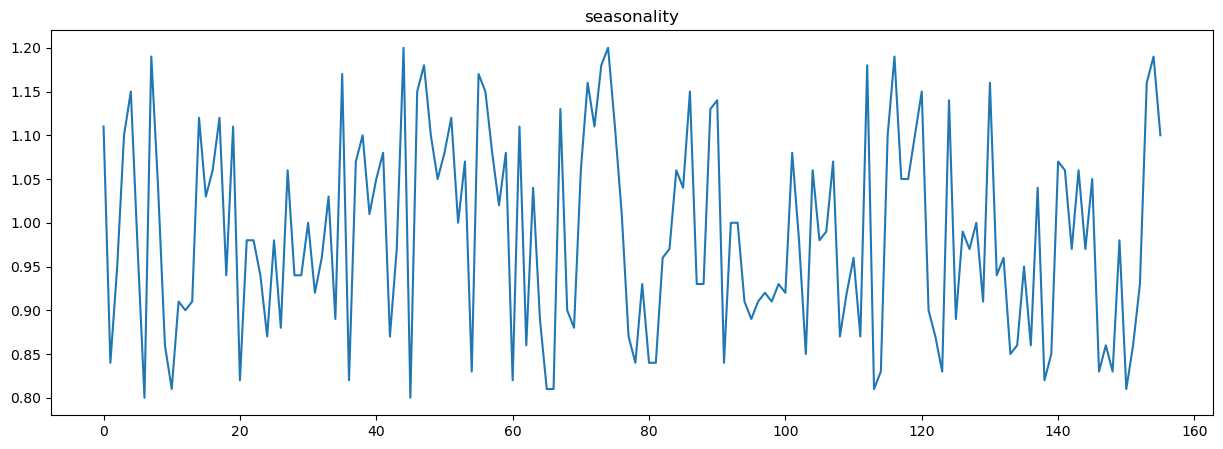

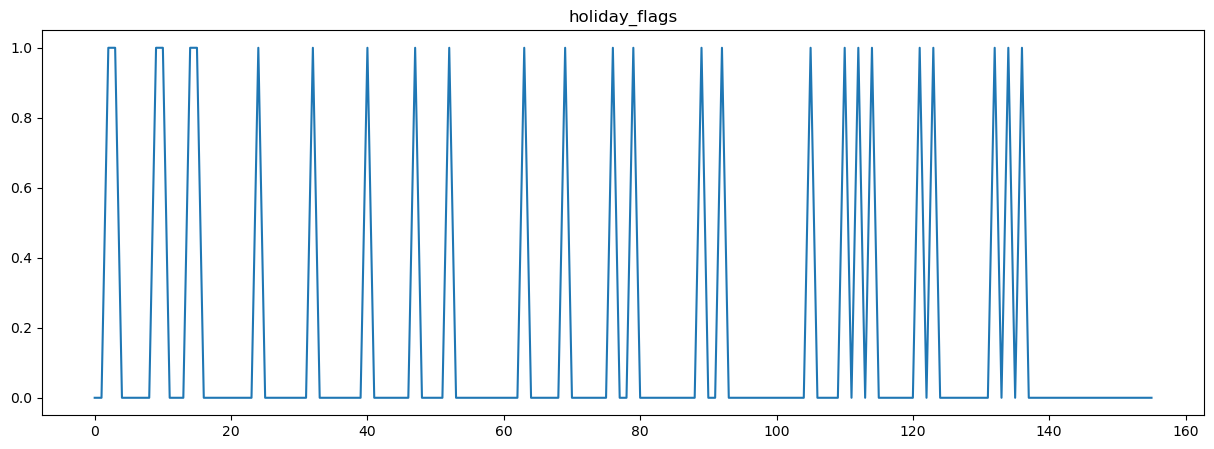

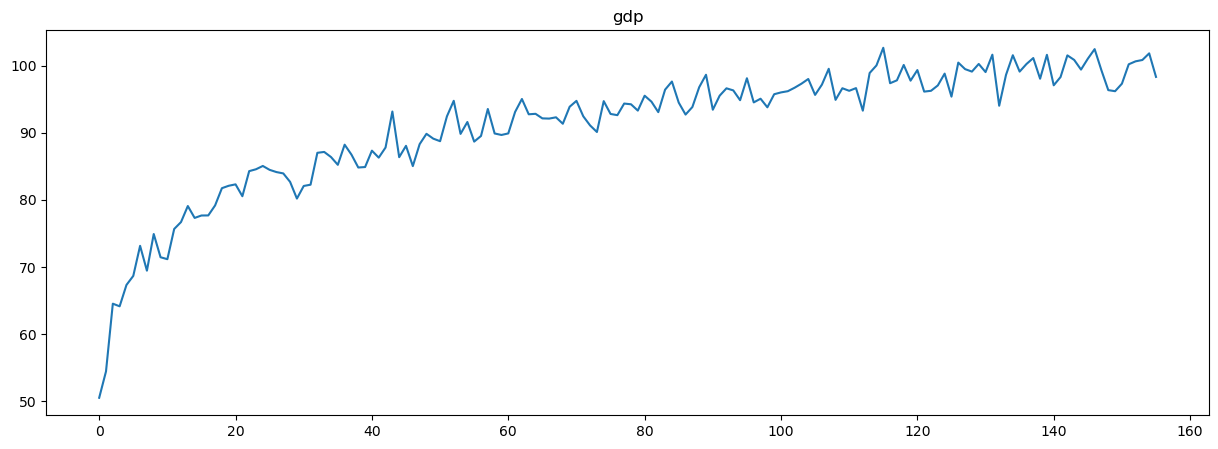

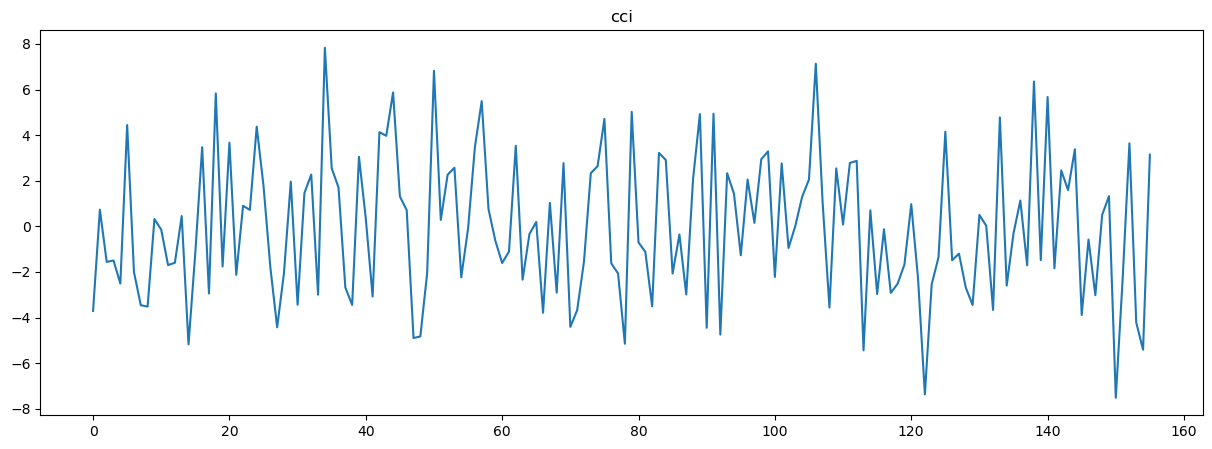

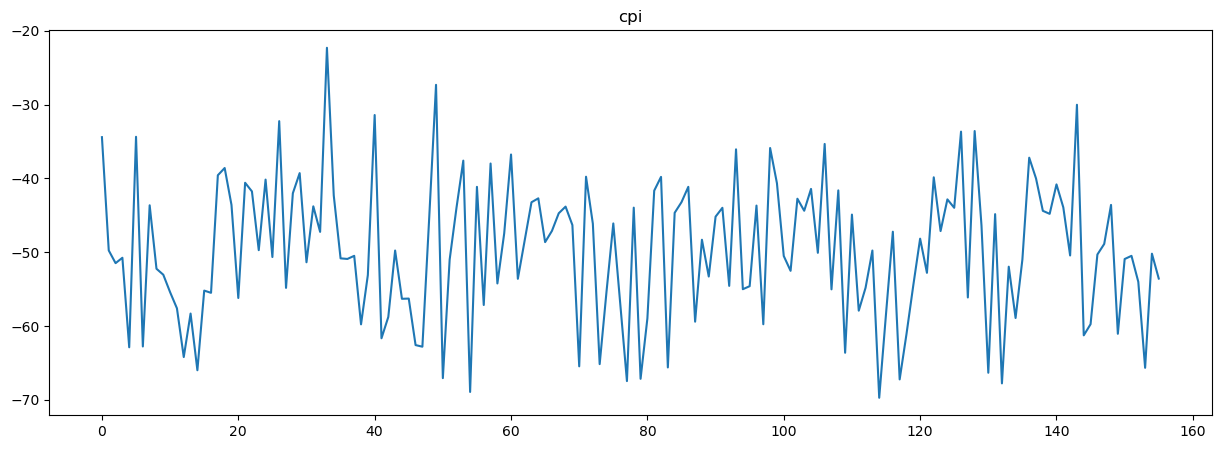

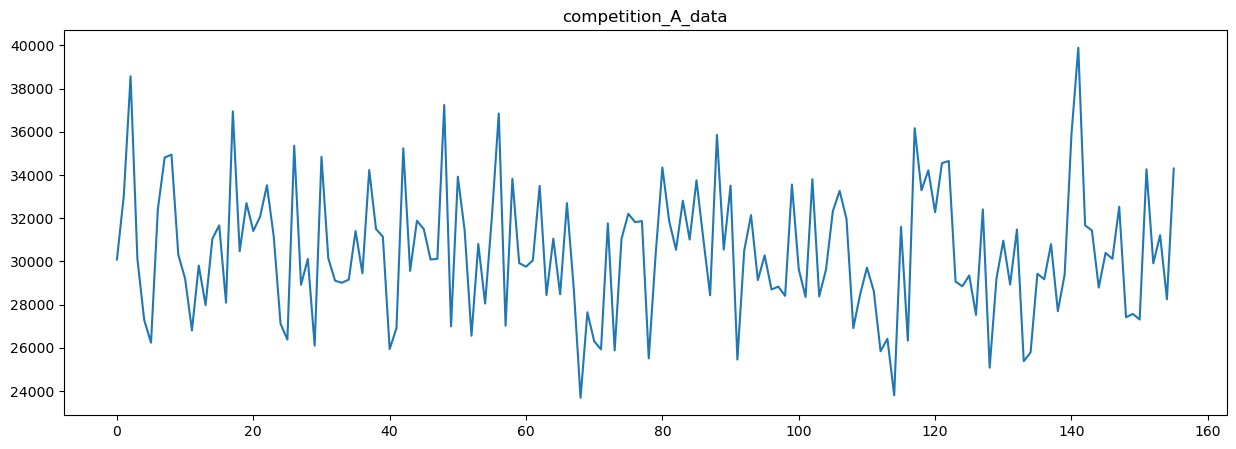

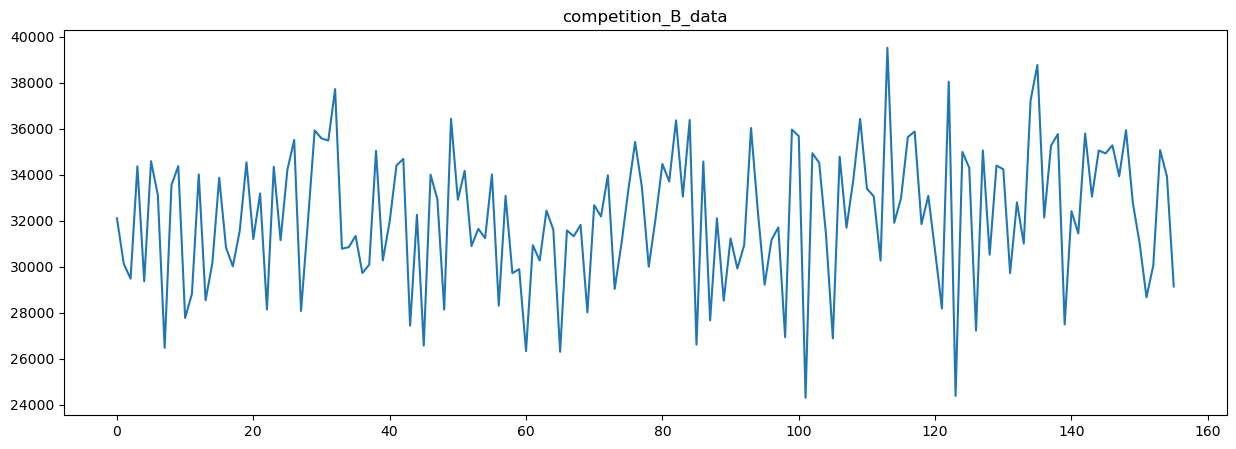

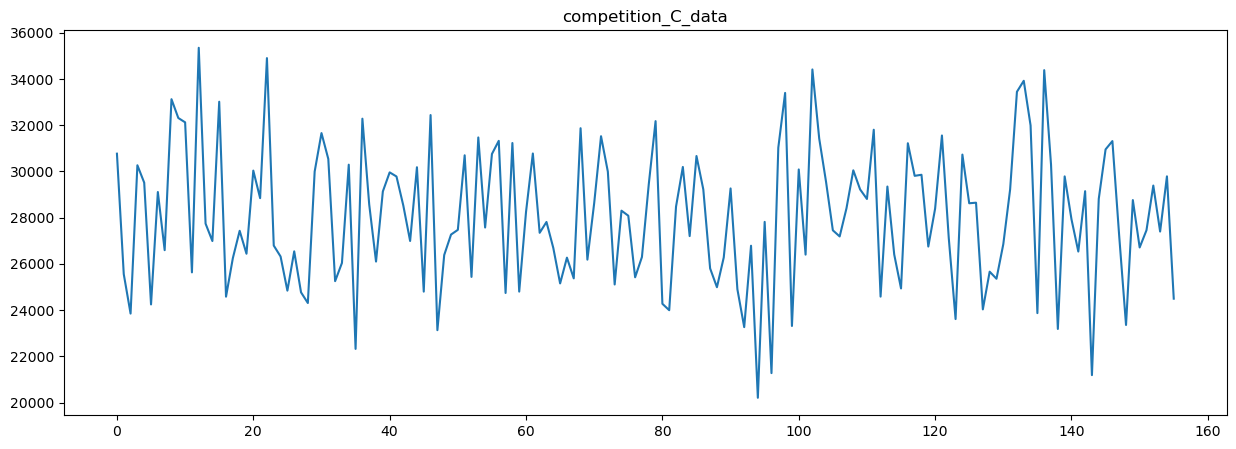

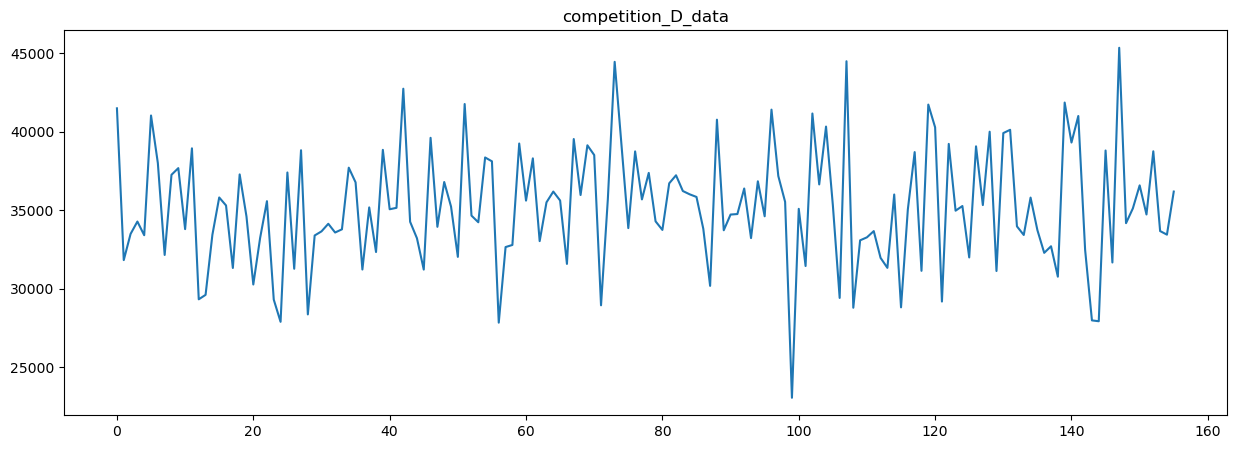

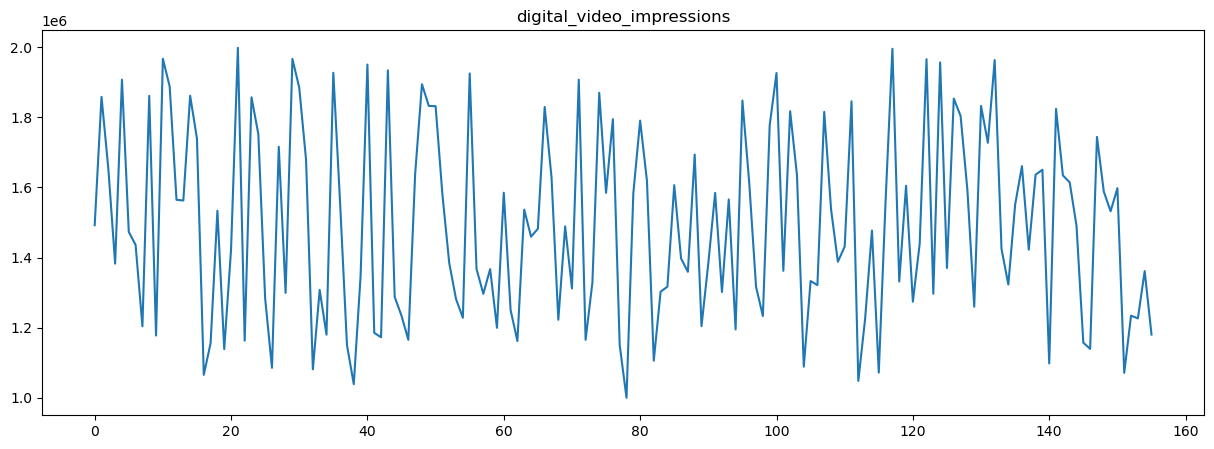

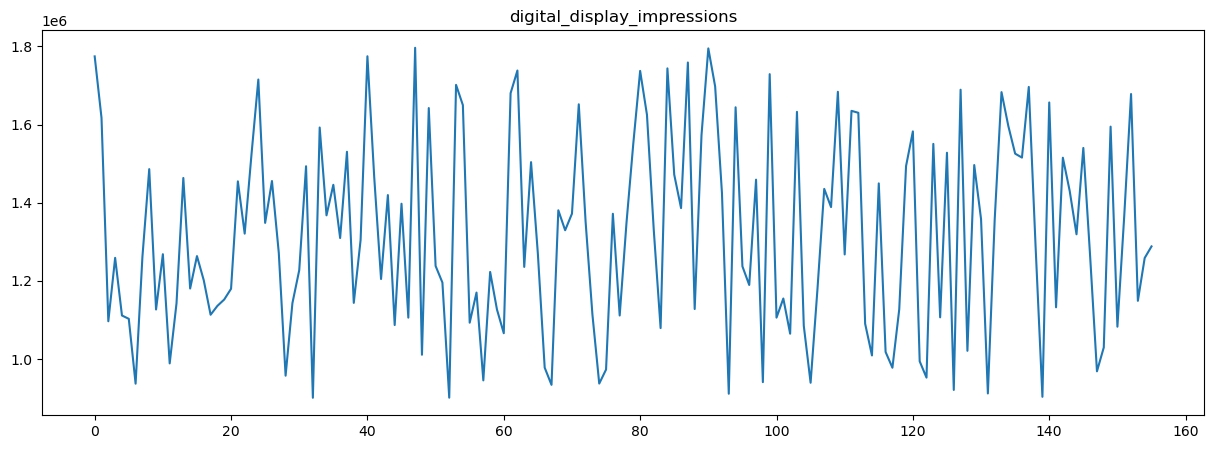

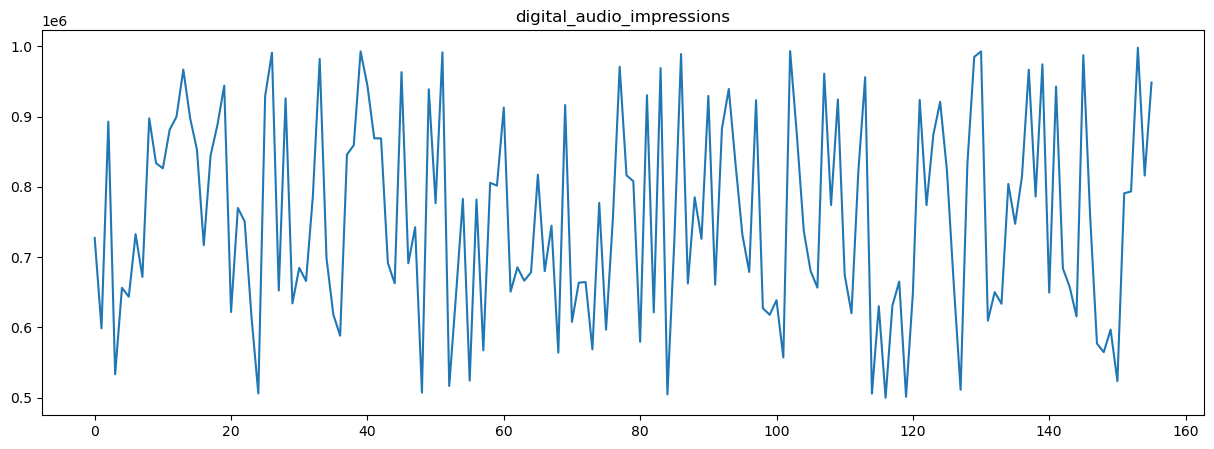

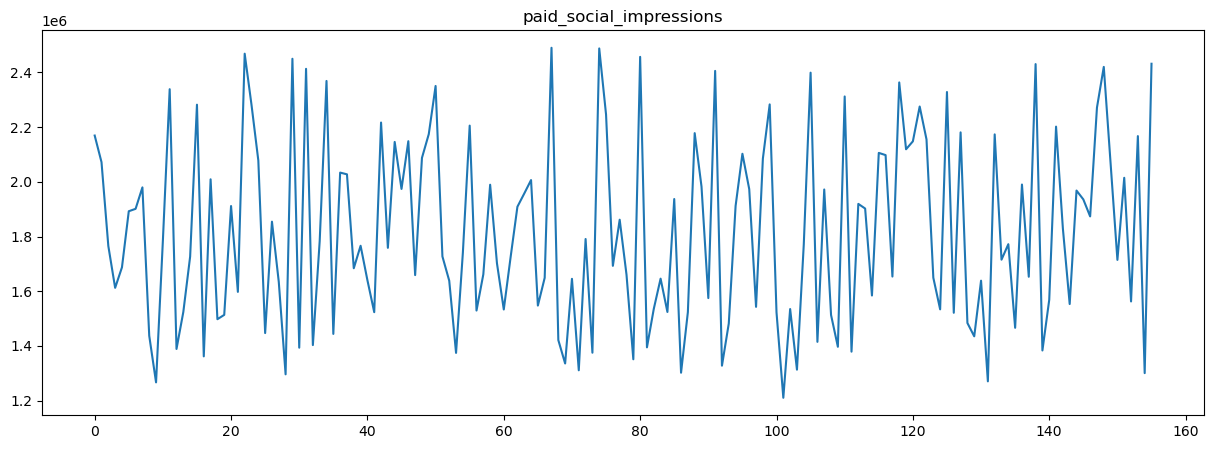

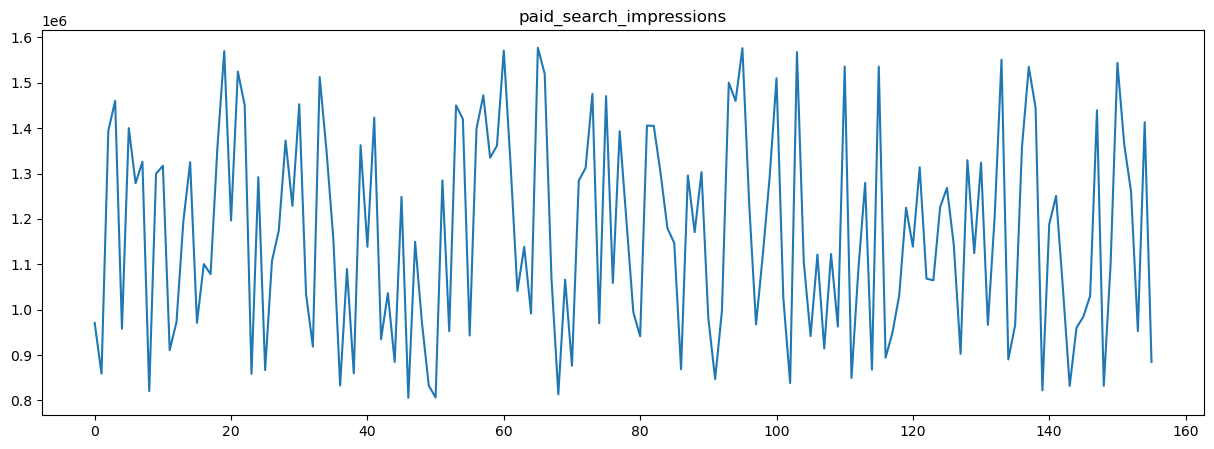

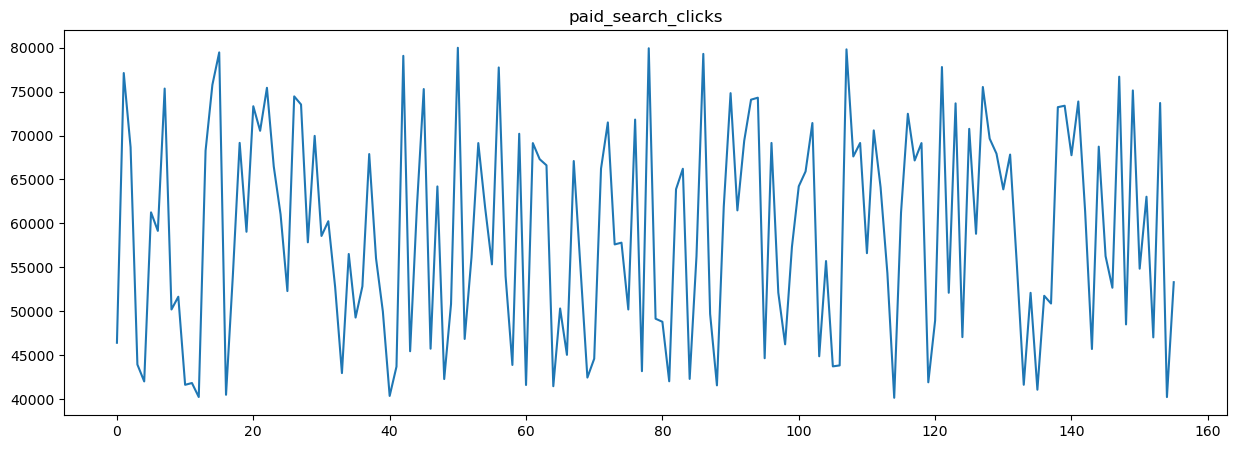

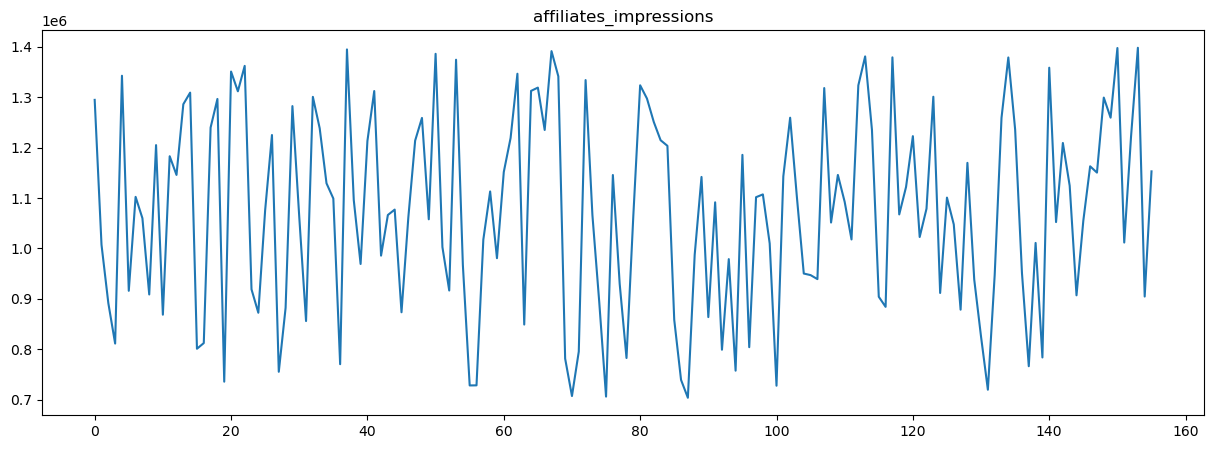

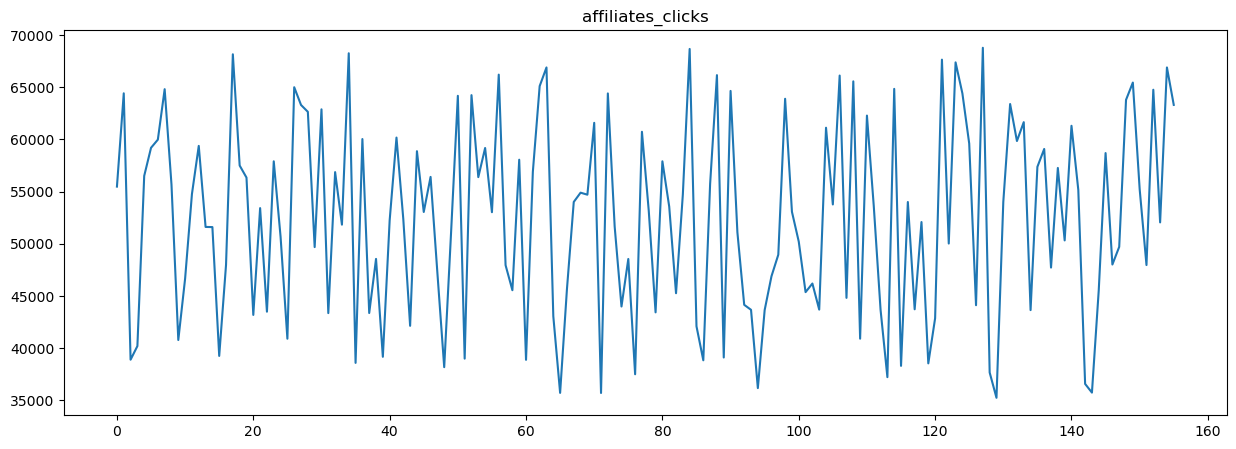

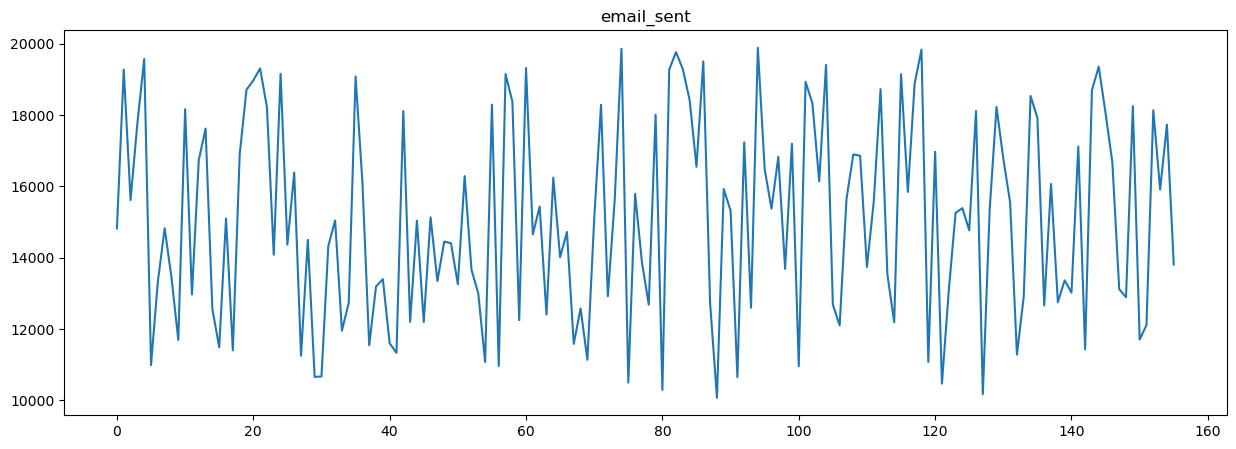

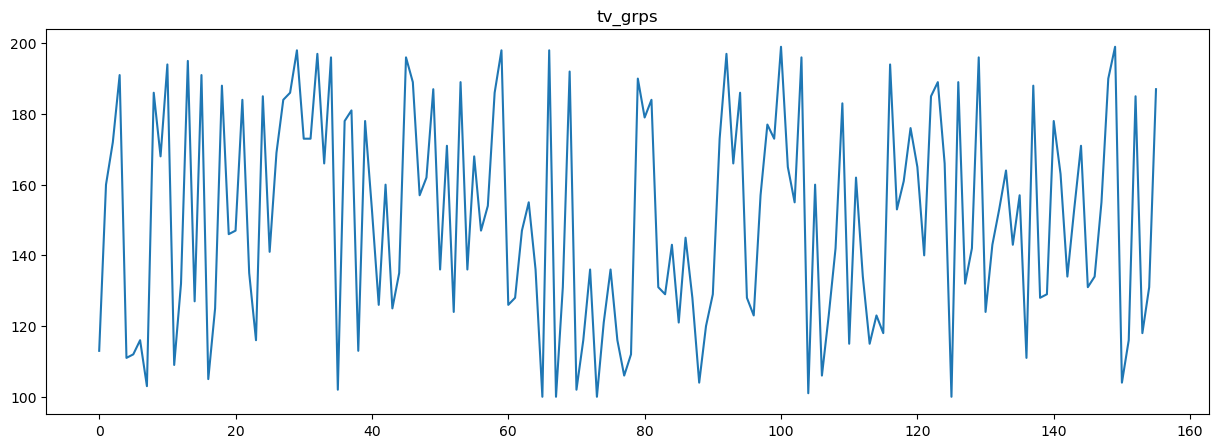

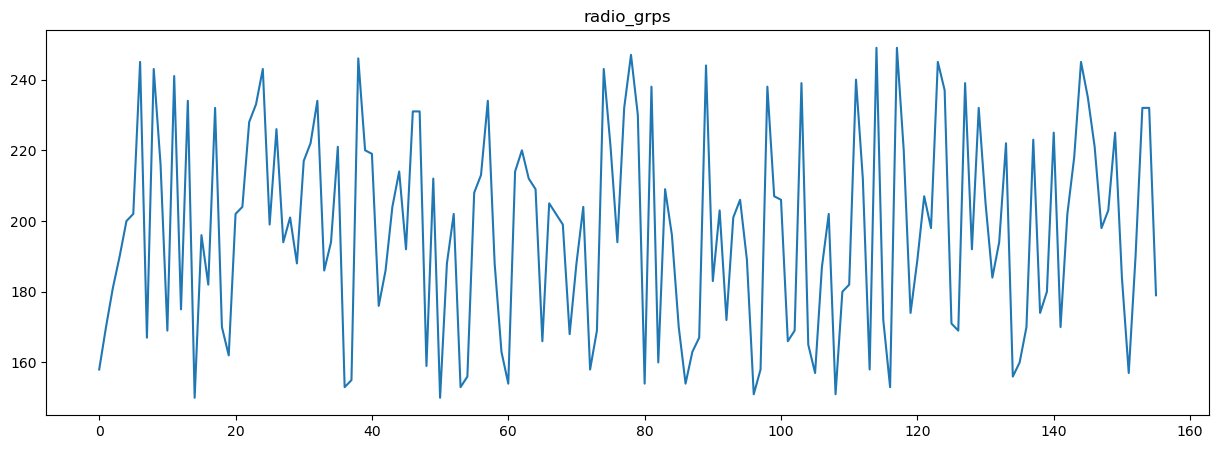

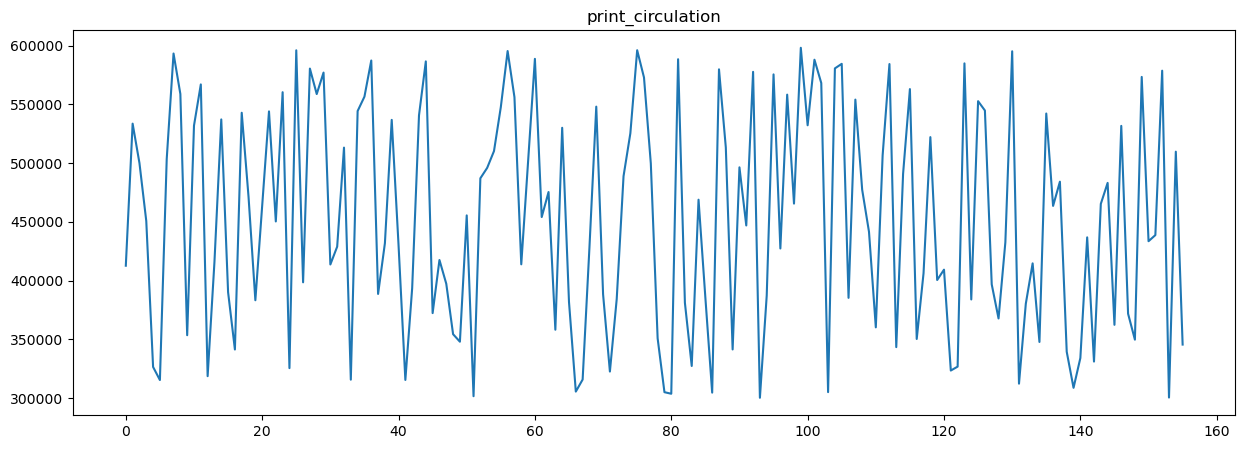

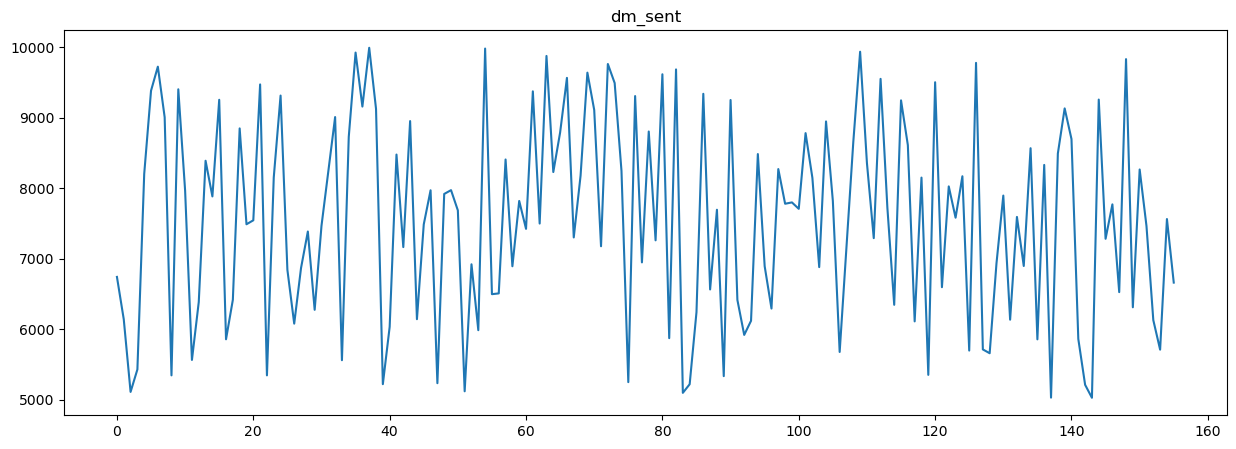

In [6]:
df= pd.read_csv('dummy_marketing_mix_data10.csv')

cols= df.columns[1:]

for i in (cols):
    plt.figure(figsize=(15,5))
    plt.plot(range(0,156), df[i])
    plt.title(i)

In [7]:
df.head(10)

,date,business_operations,inventory,price,loyalty_promotions,weather,seasonality,holiday_flags,gdp,cci,...,paid_social_impressions,paid_search_impressions,paid_search_clicks,affiliates_impressions,affiliates_clicks,email_sent,tv_grps,radio_grps,print_circulation,dm_sent
0,02/01/2022,52211,945,21.84,1035,29.22,1.11,0,50.52,-3.71,...,2169161,970789,46441,1294494,55479,14823,113,158,412741,6744
1,09/01/2022,58509,1008,17.79,1252,27.69,0.84,0,54.45,0.73,...,2071860,859000,77102,1007404,64416,19280,160,170,533650,6143
2,16/01/2022,45802,945,20.44,1087,33.45,0.95,1,64.54,-1.56,...,1765368,1394317,68676,891815,38898,15620,172,181,500128,5112
3,23/01/2022,51984,1058,18.59,1233,24.17,1.10,1,64.15,-1.50,...,1612395,1460240,43966,811596,40202,17773,191,190,450805,5431
4,30/01/2022,37760,1045,17.28,1644,30.68,1.15,0,67.33,-2.51,...,1687339,958145,42043,1342302,56507,19576,111,200,326599,8205
5,06/02/2022,58270,1061,18.66,1345,30.09,0.97,0,68.68,4.44,...,1892417,1400150,61265,916139,59197,10989,112,202,315442,9386
6,13/02/2022,46797,1020,21.98,1773,21.09,0.80,0,73.16,-2.01,...,1901228,1278817,59157,1102306,59978,13330,116,245,503544,9727
7,20/02/2022,45313,1121,23.70,1955,26.28,1.19,0,69.46,-3.46,...,1979681,1325998,75336,1060007,64812,14827,103,167,593326,9009
8,27/02/2022,59832,981,19.72,1394,20.93,1.04,0,74.92,-3.52,...,1437148,820354,50222,908850,55677,13447,186,243,558877,5347
9,06/03/2022,44022,1057,21.25,1196,26.59,0.86,1,71.46,0.32,...,1266753,1299471,51672,1204850,40784,11691,168,216,353593,9406


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         156 non-null    object 
 1   business_operations          156 non-null    int64  
 2   inventory                    156 non-null    int64  
 3   price                        156 non-null    float64
 4   loyalty_promotions           156 non-null    int64  
 5   weather                      156 non-null    float64
 6   seasonality                  156 non-null    float64
 7   holiday_flags                156 non-null    int64  
 8   gdp                          156 non-null    float64
 9   cci                          156 non-null    float64
 10  cpi                          156 non-null    float64
 11  competition_A_data           156 non-null    int64  
 12  competition_B_data           156 non-null    int64  
 13  competition_C_data  